# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import time

import openweathermapy.core as owm


#config
#from config_owm.py import api_key
#print(api_key)
from config_owm import apikey


# Import API key
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
print(apikey)

f9892df2033f32bb6f8be5d1acdf75ab


## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

counter = 0

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    counter += 1
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if counter % 50 == 0:
        print(f'City #{counter} is {city} - lat:{lat_lng[0]}, lng:{lat_lng[1]}')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

City #50 is mys shmidta - lat:70.82393152210344, lng:-176.48661946399446
City #100 is batemans bay - lat:-36.26075844032212, lng:150.7715597606446
City #150 is ambam - lat:2.45093987097205, lng:10.976395298917453
City #200 is jamestown - lat:-28.19593177733161, lng:-2.9163180332468244
City #250 is qaanaaq - lat:83.27242099803104, lng:-78.52400138704468
City #300 is chany - lat:55.331227879120064, lng:76.39713246497394
City #350 is ancud - lat:-42.323151836692524, lng:-106.84741834306057
City #400 is atuona - lat:-2.5647108936453833, lng:-131.13965966687806
City #450 is qaanaaq - lat:89.77552736552258, lng:-78.57198777413052
City #500 is saint-philippe - lat:-68.41470738706633, lng:71.78430578712275
City #550 is rikitea - lat:-39.48146344454811, lng:-112.95784189188484
City #600 is itacoatiara - lat:-3.0664768530845663, lng:-58.51041852424619
City #650 is sidi bu zayd - lat:34.99190961113135, lng:9.261516265221161
City #700 is magdalena - lat:10.067727246720523, lng:121.60097924856012
C

635

In [9]:
cities

['makakilo city',
 'rikitea',
 'nome',
 'puerto ayora',
 'torbay',
 'avarua',
 'saint-philippe',
 'hobart',
 'souillac',
 'vaini',
 'hasaki',
 'leh',
 'tank',
 'alice springs',
 'buchanan',
 'agadez',
 'kaitangata',
 'lubango',
 'victoria',
 'takaka',
 'port elizabeth',
 'busselton',
 'bluff',
 'longyearbyen',
 'turukhansk',
 'ushuaia',
 'tuktoyaktuk',
 'college',
 'tilichiki',
 'shellbrook',
 'esperance',
 'amapa',
 'port hardy',
 'ostrovnoy',
 'zhangye',
 'tuatapere',
 'westport',
 'san borja',
 'manado',
 'cherskiy',
 'nizhneyansk',
 'mar del plata',
 'bengkulu',
 'yellowknife',
 'yanan',
 'harper',
 'mys shmidta',
 'bridlington',
 'illoqqortoormiut',
 'tura',
 'mataura',
 'georgetown',
 'husavik',
 'barrow',
 'haapiti',
 'homer',
 'collipulli',
 'taolanaro',
 'lavrentiya',
 'bethel',
 'arraial do cabo',
 'greenwood',
 'homestead',
 'bredasdorp',
 'dondo',
 'atuona',
 'deputatskiy',
 'khatanga',
 'albany',
 'lorengau',
 'swan hill',
 'dingle',
 'hithadhoo',
 'tarko-sale',
 'shatsk',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# an API call is made up of a couple of things
# 1.) base url -> location, everything after the base url -> 'order' configuration
# 2.) send the order
# 3.) do something with the returned object

# 1.) URL
# parts:            location        |      configuration...                  password                    specifics
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + apikey + "&q=kawalu"

# send the order
kawalu_data = requests.get(url)

kawalu_data = kawalu_data.json()
kawalu_data

{'coord': {'lon': 108.21, 'lat': -7.38},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 61.79,
  'pressure': 1012.5,
  'humidity': 95,
  'temp_min': 61.79,
  'temp_max': 61.79,
  'sea_level': 1012.5,
  'grnd_level': 945.04},
 'wind': {'speed': 3.62, 'deg': 30.721},
 'clouds': {'all': 33},
 'dt': 1567620490,
 'sys': {'message': 0.0063,
  'country': 'ID',
  'sunrise': 1567637196,
  'sunset': 1567680361},
 'timezone': 25200,
 'id': 1640902,
 'name': 'Kawalu',
 'cod': 200}

In [11]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9892df2033f32bb6f8be5d1acdf75ab&q=kawalu'

In [12]:
# process the order -> City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
compact_data = {
    'City': kawalu_data['name'],
    'Cloudiness': kawalu_data['clouds']['all'],
    'Country': kawalu_data['sys']['country'],
    'Date': kawalu_data['dt'],
    'Humidity': kawalu_data['main']['humidity'],
    'Lat': kawalu_data['coord']['lat'],
    'Lng': kawalu_data['coord']['lon'],
    'Max Temp': kawalu_data['main']['temp_max'],
    'Wind Speed': kawalu_data['wind']['speed']
}

compact_data

{'City': 'Kawalu',
 'Cloudiness': 33,
 'Country': 'ID',
 'Date': 1567620490,
 'Humidity': 95,
 'Lat': -7.38,
 'Lng': 108.21,
 'Max Temp': 61.79,
 'Wind Speed': 3.62}

In [5]:
# The things we need:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

In [13]:
test_req = requests.get("http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad77a28e519eb987f6fea5444af81b47&q=barentsburg")
test_req.json()

{'cod': '404', 'message': 'city not found'}

In [14]:
cities[0:10]

['makakilo city',
 'rikitea',
 'nome',
 'puerto ayora',
 'torbay',
 'avarua',
 'saint-philippe',
 'hobart',
 'souillac',
 'vaini']

In [15]:
# Compiled list of city weather data dictionaries
compiled_list = []

# For loop through list of city names, and create a compact dictionary for each api call result

for city in cities:
    print('Creating api call for city:', city)
    # sample: city = vaini
    
    # 1.) base url -> location, everything after the base url -> 'order' configuration
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + apikey + "&q=" + city

    # 2.) send the order
    request_data = requests.get(url)
    
    # check to see if order is good or not 
    if request_data.status_code == 200:
        json_data = request_data.json()
        # 3.) do something with the returned object
        compact_data = {
            'City': json_data['name'],
            'Cloudiness': json_data['clouds']['all'],
            'Country': json_data['sys']['country'],
            'Date': json_data['dt'],
            'Humidity': json_data['main']['humidity'],
            'Lat': json_data['coord']['lat'],
            'Lng': json_data['coord']['lon'],
            'Max Temp': json_data['main']['temp_max'],
            'Wind Speed': json_data['wind']['speed']
        }

        # 4.) Add data to list
        compiled_list.append(compact_data)
    else:
        print('No data found for city:', city)

        # 4.) Add data to list
        compiled_list.append(compact_data)


Creating api call for city: makakilo city
Creating api call for city: rikitea
Creating api call for city: nome
Creating api call for city: puerto ayora
Creating api call for city: torbay
Creating api call for city: avarua
Creating api call for city: saint-philippe
Creating api call for city: hobart
Creating api call for city: souillac
Creating api call for city: vaini
Creating api call for city: hasaki
Creating api call for city: leh
Creating api call for city: tank
Creating api call for city: alice springs
Creating api call for city: buchanan
Creating api call for city: agadez
Creating api call for city: kaitangata
Creating api call for city: lubango
Creating api call for city: victoria
Creating api call for city: takaka
Creating api call for city: port elizabeth
Creating api call for city: busselton
Creating api call for city: bluff
Creating api call for city: longyearbyen
Creating api call for city: turukhansk
Creating api call for city: ushuaia
Creating api call for city: tuktoyakt

Creating api call for city: chany
Creating api call for city: jiwani
Creating api call for city: khasan
Creating api call for city: aykhal
Creating api call for city: bambanglipuro
Creating api call for city: pochutla
Creating api call for city: toul
Creating api call for city: zhigansk
Creating api call for city: lamar
Creating api call for city: imbituba
Creating api call for city: provideniya
Creating api call for city: marystown
Creating api call for city: gisborne
Creating api call for city: saleaula
No data found for city: saleaula
Creating api call for city: cape town
Creating api call for city: riyadh
Creating api call for city: braslav
No data found for city: braslav
Creating api call for city: muisne
Creating api call for city: clermont
Creating api call for city: nhulunbuy
Creating api call for city: alofi
Creating api call for city: gurgan
No data found for city: gurgan
Creating api call for city: varhaug
Creating api call for city: coquimbo
Creating api call for city: ugle

Creating api call for city: eseka
Creating api call for city: yulara
Creating api call for city: klyuchi
Creating api call for city: mehamn
Creating api call for city: norsup
Creating api call for city: haines junction
Creating api call for city: constitucion
Creating api call for city: meadow lake
Creating api call for city: meulaboh
Creating api call for city: leningradskiy
Creating api call for city: olavarria
Creating api call for city: koungou
No data found for city: koungou
Creating api call for city: fortuna foothills
Creating api call for city: khormuj
No data found for city: khormuj
Creating api call for city: berezovyy
Creating api call for city: kangasala
Creating api call for city: lieksa
Creating api call for city: ulvik
Creating api call for city: curup
Creating api call for city: airai
Creating api call for city: terrace
Creating api call for city: aklavik
Creating api call for city: la plaine
Creating api call for city: augusto correa
Creating api call for city: affery


Creating api call for city: samur
Creating api call for city: boyolangu
Creating api call for city: visaginas
Creating api call for city: gat
Creating api call for city: marawi
Creating api call for city: puerto rico
Creating api call for city: mayo
Creating api call for city: marabba
Creating api call for city: buqayq
No data found for city: buqayq
Creating api call for city: lensk
Creating api call for city: sabalgarh
Creating api call for city: cavan
Creating api call for city: mezen
Creating api call for city: kalulushi
Creating api call for city: lasa
Creating api call for city: kindia
Creating api call for city: george
Creating api call for city: san ramon
Creating api call for city: kukes
Creating api call for city: barguzin
Creating api call for city: toktogul
Creating api call for city: muros
Creating api call for city: luanda
Creating api call for city: nizwa


In [33]:
# look at result list
compiled_list

[{'City': 'Birjand',
  'Cloudiness': 0,
  'Country': 'IR',
  'Date': 1565627194,
  'Humidity': 21,
  'Lat': 32.86,
  'Lng': 59.22,
  'Max Temp': 78.8,
  'Wind Speed': 16.11},
 {'City': 'Punta Arenas',
  'Cloudiness': 20,
  'Country': 'CL',
  'Date': 1565627194,
  'Humidity': 59,
  'Lat': -53.16,
  'Lng': -70.91,
  'Max Temp': 35.6,
  'Wind Speed': 10.29},
 {'City': 'Tiksi',
  'Cloudiness': 0,
  'Country': 'RU',
  'Date': 1565627077,
  'Humidity': 67,
  'Lat': 71.64,
  'Lng': 128.87,
  'Max Temp': 51.41,
  'Wind Speed': 3.91},
 {'City': 'New Norfolk',
  'Cloudiness': 40,
  'Country': 'AU',
  'Date': 1565627195,
  'Humidity': 70,
  'Lat': -42.78,
  'Lng': 147.06,
  'Max Temp': 46.99,
  'Wind Speed': 5.82},
 {'City': 'New Norfolk',
  'Cloudiness': 40,
  'Country': 'AU',
  'Date': 1565627195,
  'Humidity': 70,
  'Lat': -42.78,
  'Lng': 147.06,
  'Max Temp': 46.99,
  'Wind Speed': 5.82},
 {'City': 'Vanimo',
  'Cloudiness': 30,
  'Country': 'PG',
  'Date': 1565627195,
  'Humidity': 75,
  'La

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# turn to dataframe
city_weather_df = pd.DataFrame(compiled_list)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Makakilo City,1,US,1567620524,66,21.35,-158.09,84.20,3.36
1,Rikitea,95,PF,1567620524,71,-23.12,-134.97,72.95,7.40
2,Nome,40,US,1567620524,41,30.04,-94.42,95.00,8.05
3,Puerto Ayora,40,EC,1567620525,65,-0.74,-90.35,78.80,21.92
4,Torbay,75,CA,1567620506,77,47.66,-52.73,71.01,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [41]:
#city_weather_df.plot(king="scatter",x="Lat",y="Max Temp")

No handles with labels found to put in legend.


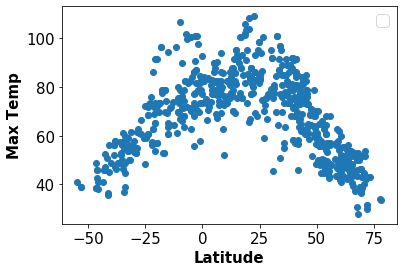

In [18]:
# build scatter
plt.scatter(x=city_weather_df["Lat"],y=city_weather_df["Max Temp"])

plt.legend(fontsize =16)
plt.xlabel('Latitude', size=15, weight="bold")
plt.ylabel('Max Temp', size=15, weight="bold")
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [19]:


plt.tight_layout()
plt.savefig("c:/Users/aj_si/Downloads/bootcamp/weather_plot_lat_temp_ajs.png")


<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

No handles with labels found to put in legend.


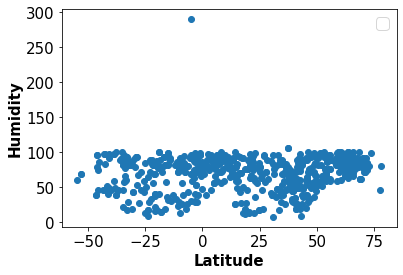

In [20]:
# build scatter
plt.scatter(x=city_weather_df["Lat"],y=city_weather_df["Humidity"])


plt.legend(fontsize =16)
plt.xlabel('Latitude', size=15, weight="bold")
plt.ylabel('Humidity', size=15, weight="bold")
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()


In [21]:
plt.tight_layout()
plt.savefig("c:/Users/aj_si/Downloads/bootcamp/weather_plot_lat_hum_ajs.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

No handles with labels found to put in legend.


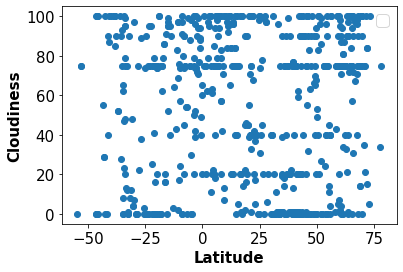

In [22]:
# build scatter
plt.scatter(x=city_weather_df["Lat"],y=city_weather_df["Cloudiness"])

plt.legend(fontsize =16)
plt.xlabel('Latitude', size=15, weight="bold")
plt.ylabel('Cloudiness', size=15, weight="bold")
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [23]:
plt.tight_layout()
plt.savefig("c:/Users/aj_si/Downloads/bootcamp/weather_plot_lat_cloud_ajs.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

No handles with labels found to put in legend.


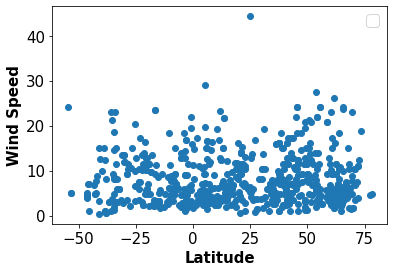

In [24]:
# build scatter
plt.scatter(x=city_weather_df["Lat"],y=city_weather_df["Wind Speed"])


plt.legend(fontsize =16)
plt.xlabel('Latitude', size=15, weight="bold")
plt.ylabel('Wind Speed', size=15, weight="bold")
plt.tick_params(axis='both', which='major', labelsize=15)



plt.show()

In [25]:
plt.tight_layout()
plt.savefig("c:/Users/aj_si/Downloads/bootcamp/weather_plot_lat_wind_ajs.png")

<Figure size 432x288 with 0 Axes>